In [54]:
import pandas as pd

df = pd.read_csv("Train_SU63ISt.csv")
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df = df.groupby(['year', 'month'])['Count'].sum()
#df.plot()
X = list(df.index)
y = df.array

In [219]:
df = pd.read_csv("Train_SU63ISt.csv")
# Assumes that has 1 input for hour
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df['day'] = pd.DatetimeIndex(df['Datetime']).day
df['hour'] = pd.DatetimeIndex(df['Datetime']).hour
X = df[['year', 'month', 'day', 'hour']]
y = df['Count']



In [212]:
df.count()['ID']/600

30.48

In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)
#scores = cross_val_score(regressor, X, y, cv=600, scoring="neg_root_mean_squared_error")
#print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Test

### Prepare data

In [221]:
test_df = pd.read_csv("Test_0qrQsBZ.csv")
# Assumes that has 1 input for hour
test_df['year'] = pd.DatetimeIndex(test_df['Datetime']).year
test_df['month'] = pd.DatetimeIndex(test_df['Datetime']).month
test_df['day'] = pd.DatetimeIndex(test_df['Datetime']).day
test_df['hour'] = pd.DatetimeIndex(test_df['Datetime']).hour
X_test = test_df[['year', 'month', 'day', 'hour']]


### Predict

In [223]:
y_pred = regressor.predict(X_test)
y_pred

array([686., 546., 550., ..., 182., 212., 212.])

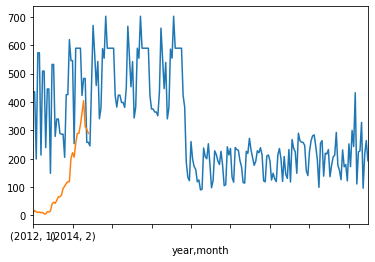

In [229]:
df_pred = test_df
df_pred['Count'] = y_pred
df_pred.groupby(["year", "month", "day"])['Count'].mean().plot()
df.groupby(["year", "month"])['Count'].mean().plot()

In [246]:
import numpy as np
df["Count"] = df["Count"].astype("int")
df_pred[['ID', 'Count']].to_csv("results1.csv", index=False)

Result submission 1: 285.3520619207512